# Twomoons data example
This is an example that illustrates how to synthesize data with `arfpy`.

In [1]:
from sklearn.datasets import make_moons
from arfpy import arf
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from numpy import random
random.seed(seed=2022)

First, we load the data:

In [2]:
n_train = 2000
n_test = 1000
moons_X, moons_y = make_moons(n_samples = n_train+n_test,  noise=0.1)  
df = pd.DataFrame({"dim_1" : moons_X[:,0], "dim_2" : moons_X[:,1], "target" : moons_y})
df['target'] = df['target'].astype('category')

Now we can define the ARF object:

In [3]:
my_arf = arf.arf(x = df[:n_train], min_node_size=2, num_trees=20, max_features = 2)


Initial accuracy is 0.8125
Iteration number 1 reached accuracy of 0.3215.


Next, we estimate the density:

In [4]:
FORDE = my_arf.forde()

Finally, we can generate some new data:

In [5]:
df_syn = my_arf.forge(n = n_test)

Let's invesitgate whether our synthesized data looks realistic!

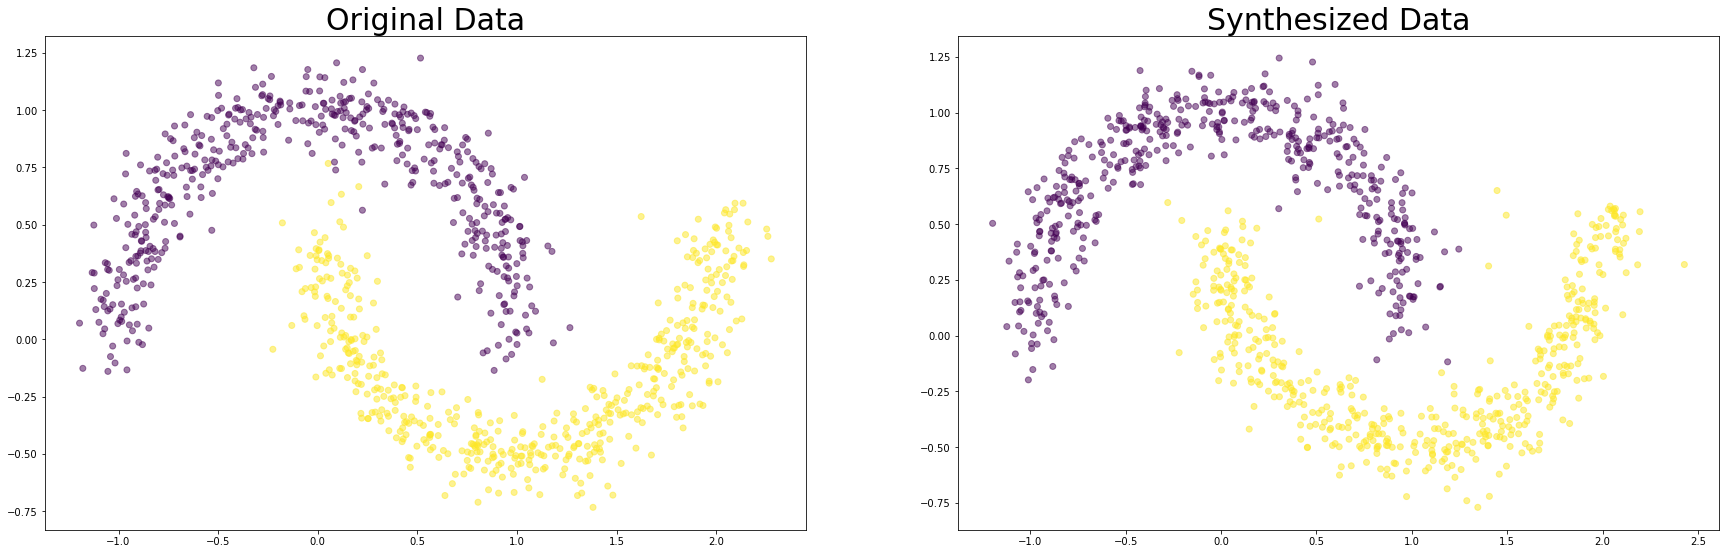

In [21]:
plt.subplot(2, 2, 1)
df_test = df[:n_train].sample(n=n_test)
plt.scatter(df_test['dim_1'], df_test['dim_2'], c = df_test['target'], alpha = 0.5)
plt.title('Original Data', fontsize = 30)

plt.subplot(2, 2, 2)
plt.scatter(df_syn['dim_1'], df_syn['dim_2'], c = df_syn['target'], alpha = 0.5)
plt.title('Synthesized Data', fontsize = 30)

plt.rcParams['figure.figsize'] = [30, 20]
plt.show()